# Pre processamento

Pré-processamento dos dados de pesquisa no IEEE Xplore, Web Of Science e Scopus

#### Importação de pacotes

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#### Preâmbulo

1. PATHS

In [14]:
input_path = './Build/Search2/Input'
output_path = './Build/Search2/Output'
img_path = './Images'

2. CORES

In [15]:
grid_gray = '#E5E4E2'
warm1 = '#F94144'
warm2 = '#F3722C'
warm3 = '#F8961E'
warm4 = '#F9844A'
warm5 = '#F9C74F'
cold1 = '#90BE6D'
cold2 = '#43AA8B'
cold3 = '#4D908E'
cold4 = '#577590'
cold5 = '#277DA1'

3. DADOS

Foram feitos dois queries:

- Query 1: OPC UA e Security
- Query 2: Completo

In [16]:
ieee_query1_raw = pd.read_csv(f'{input_path}/IEEE-opcua_AND_security-K.csv')
ieee_query2_raw = pd.read_csv(f'{input_path}/IEEE-opcua_AND_vul_OR-TAK.csv')
scopus_query1_raw = pd.read_csv(f'{input_path}/SCOPUS-opcua_AND_security-K.csv')
scopus_query2_raw = pd.read_csv(f'{input_path}/SCOPUS-opcua_AND_vul_OR-TAK.csv')
wos_query1_raw = pd.read_excel(f'{input_path}/WOS-opcua_AND_security-K.xls')
wos_query2_raw = pd.read_excel(f'{input_path}/WOS-opcua_AND_vul_OR-ALL.xls')

#### Remover colunas indesejadas

In [17]:
ieee_col_to_keep = [ieee_query1_raw.columns[0], ieee_query1_raw.columns[1], ieee_query1_raw.columns[5], ieee_query1_raw.columns[13], ieee_query1_raw.columns[-1]]
scopus_col_to_keep = [scopus_query1_raw.columns[2], scopus_query1_raw.columns[0], scopus_query1_raw.columns[3], scopus_query1_raw.columns[-7], scopus_query1_raw.columns[-5]]
wos_col_to_keep = [wos_query1_raw.columns[8], wos_query1_raw.columns[1], wos_query1_raw.columns[-26], wos_query1_raw.columns[-16], wos_query1_raw.columns[0]]

# common_columns = set(ieee_columns).intersection(scopus_columns).intersection(wos_columns)  # Interseção das três listas

ieee_query1_cln = ieee_query1_raw.drop(columns=ieee_query1_raw.columns.difference(ieee_col_to_keep), axis=1)
ieee_query2_cln = ieee_query2_raw.drop(columns=ieee_query2_raw.columns.difference(ieee_col_to_keep), axis=1)
scopus_query1_cln = scopus_query1_raw.drop(columns=scopus_query1_raw.columns.difference(scopus_col_to_keep), axis=1)
scopus_query2_cln = scopus_query2_raw.drop(columns=scopus_query2_raw.columns.difference(scopus_col_to_keep), axis=1)
wos_query1_cln = wos_query1_raw.drop(columns=wos_query1_raw.columns.difference(wos_col_to_keep), axis=1)
wos_query2_cln = wos_query2_raw.drop(columns=wos_query2_raw.columns.difference(wos_col_to_keep), axis=1)

#### Renomear colunas e fazer swap

In [18]:
ieee_query1 = ieee_query1_cln.rename(columns={'Document Title': 'Title', 'Publication Year': 'Year', 'Document Identifier': 'Document Type'})
ieee_query2 = ieee_query1_cln.rename(columns={'Document Title': 'Title', 'Publication Year': 'Year', 'Document Identifier': 'Document Type'})
scopus_query1 = scopus_query1_cln[['Title', 'Authors', 'Year', 'DOI', 'Document Type']]
scopus_query2 = scopus_query2_cln[['Title', 'Authors', 'Year', 'DOI', 'Document Type']]
wos_query1_cln = wos_query1_cln.rename(columns={'Article Title': 'Title', 'Publication Year': 'Year', 'Publication Type': 'Document Type'})
wos_query2_cln = wos_query2_cln.rename(columns={'Article Title': 'Title', 'Publication Year': 'Year', 'Publication Type': 'Document Type'})
wos_query1 = wos_query1_cln[['Title', 'Authors', 'Year', 'DOI', 'Document Type']]
wos_query2 = wos_query2_cln[['Title', 'Authors', 'Year', 'DOI', 'Document Type']]

#### Concatenar data frames e remover duplicados

In [19]:
query1_concat = pd.concat([ieee_query1, scopus_query1, wos_query1])
query2_concat = pd.concat([ieee_query2, scopus_query2, wos_query2])
aux1 = query1_concat.drop_duplicates(subset=['DOI'])
query1 = aux1.drop_duplicates(subset=['Title']).sort_values(by=['Title']).reset_index(drop=True).drop([55])
aux2 = query2_concat.drop_duplicates(subset=['DOI'])
query2 = aux2.drop_duplicates(subset=['Title']).sort_values(by=['Title']).reset_index(drop=True)

#### Dropando onde o ano é igual a 2023 

In [20]:
query1 = query1[query1['Year'] != 2023].reset_index(drop=True)
query2 = query2[query2['Year'] != 2023].reset_index(drop=True)

#### Salvar em arquivos

In [21]:
query1.to_csv(f'{output_path}/query1.csv',sep=',',encoding='UTF-8')
query2.to_csv(f'{output_path}/query2.csv',sep=',',encoding='UTF-8')

## Resultados

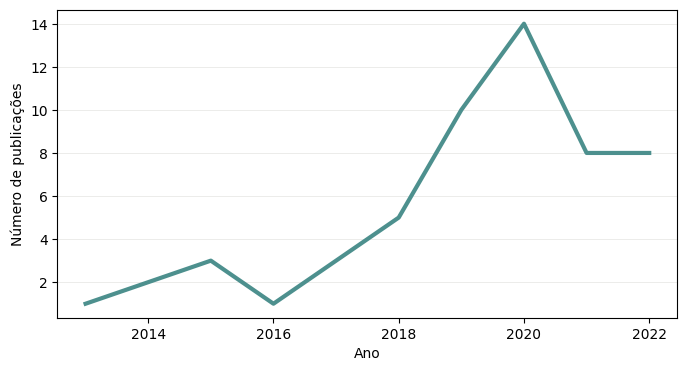

In [22]:
query1_grouped_by_year = query1.groupby('Year').size()
plt.figure(figsize=(8, 4))
query1_grouped_by_year.plot(kind='line', linestyle='-', color=cold3, linewidth=3)
plt.xlabel('Ano')
plt.ylabel('Número de publicações')
plt.grid(axis = 'y', color=grid_gray, linewidth=0.5)
plt.savefig(f'{img_path}/pubAmount1.png', format='png', dpi=600)
plt.show()

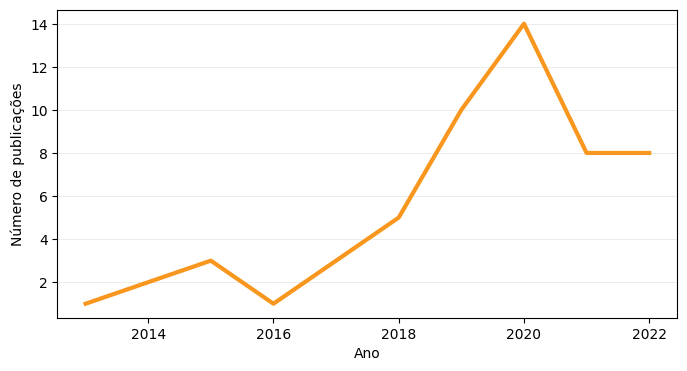

In [23]:
query1_grouped_by_year = query1.groupby('Year').size().reset_index(name='Count')
plt.figure(figsize=(8, 4))
sns.lineplot(data=query1_grouped_by_year, x='Year', y='Count', linestyle='-', color=warm3, linewidth=3)
plt.xlabel('Ano')
plt.ylabel('Número de publicações')
plt.grid(axis='y', color=grid_gray, linewidth=0.5)
plt.savefig(f'{img_path}/pubAmount2.png', format='png', dpi=600)
plt.show()

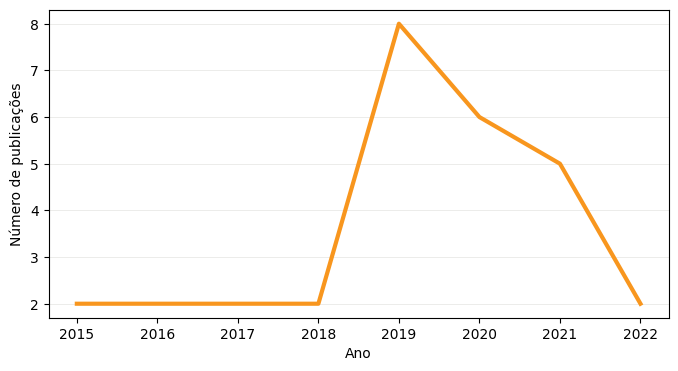

In [24]:
query2_grouped_by_year = query2.groupby('Year').size()
plt.figure(figsize=(8, 4))
query2_grouped_by_year.plot(kind='line', linestyle='-', color=warm3, linewidth=3)
plt.xlabel('Ano')
plt.ylabel('Número de publicações')
plt.grid(axis = 'y', color=grid_gray, linewidth=0.5)
plt.savefig(f'{img_path}/pubIntrusionAmount.png', format='png', dpi=600)
plt.show()